In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("employee_dataset.csv")

In [3]:
df.head()

Education  JoiningYear       City  PaymentTier  Age Gender EverBenched  \
0  Bachelors         2012  Bangalore            3   37   Male          No   
1    Masters         2017  New Delhi            2   28   Male          No   
2  Bachelors         2017  New Delhi            2   36   Male          No   
3  Bachelors         2015  Bangalore            3   27   Male         Yes   
4  Bachelors         2017  Bangalore            3   29   Male          No   

   ExperienceInCurrentDomain  LeaveOrNot  
0                          0           0  
1                          4           0  
2                          3           0  
3                          5           0  
4                          4           0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4633 entries, 0 to 4632
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4633 non-null   object
 1   JoiningYear                4633 non-null   int64 
 2   City                       4633 non-null   object
 3   PaymentTier                4633 non-null   int64 
 4   Age                        4633 non-null   int64 
 5   Gender                     4633 non-null   object
 6   EverBenched                4633 non-null   object
 7   ExperienceInCurrentDomain  4633 non-null   int64 
 8   LeaveOrNot                 4633 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 325.9+ KB


In [5]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [6]:
df.describe()

JoiningYear  PaymentTier          Age  ExperienceInCurrentDomain  \
count  4633.000000  4633.000000  4633.000000                4633.000000   
mean   2015.061731     2.698468    29.385711                   2.908483   
std       1.864144     0.560995     4.821685                   1.557005   
min    2012.000000     1.000000    22.000000                   0.000000   
25%    2013.000000     3.000000    26.000000                   2.000000   
50%    2015.000000     3.000000    28.000000                   3.000000   
75%    2017.000000     3.000000    32.000000                   4.000000   
max    2018.000000     3.000000    41.000000                   7.000000   

        LeaveOrNot  
count  4633.000000  
mean      0.343622  
std       0.474968  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

Age ranges from 22 to 41, experience varies from 0 to 7 years, and most employees joined between 2012-2018.

In [10]:
#Unique Values in Categorical Columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}: {df[col].unique()}")


Unique values in Education: ['Bachelors' 'Masters' 'PHD']

Unique values in City: ['Bangalore' 'New Delhi' 'Pune']

Unique values in Gender: ['Male' 'Female']

Unique values in EverBenched: ['No' 'Yes']


C:\Users\ankur\AppData\Local\Temp\ipykernel_14784\796063423.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["LeaveOrNot"], palette="coolwarm")


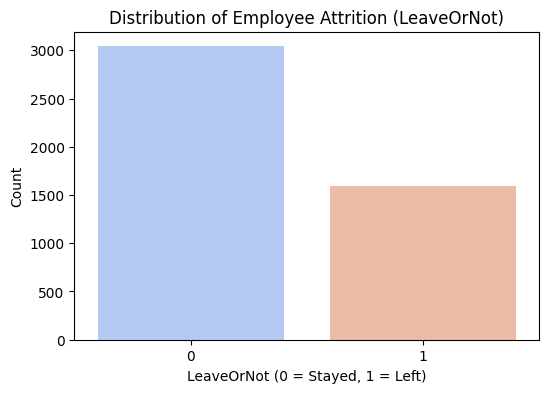

In [12]:
#Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["LeaveOrNot"], palette="coolwarm")
plt.title("Distribution of Employee Attrition (LeaveOrNot)")
plt.xlabel("LeaveOrNot (0 = Stayed, 1 = Left)")
plt.ylabel("Count")
plt.show()

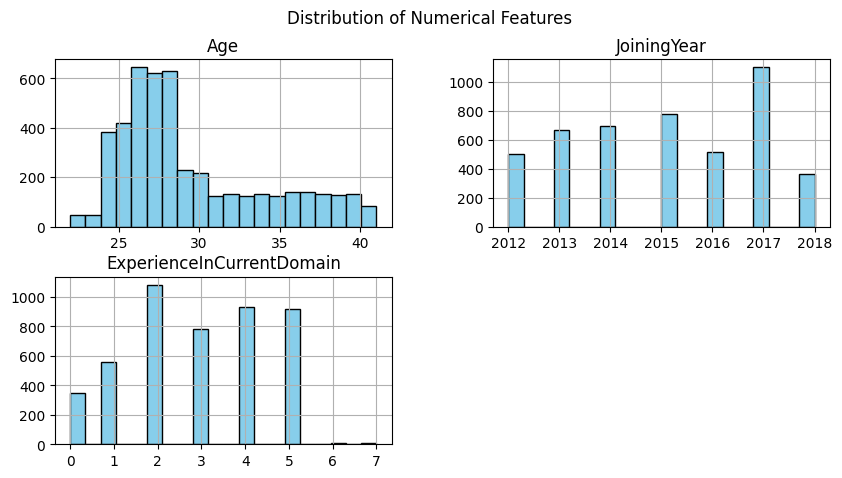

In [11]:
#Distribution of Numerical Features
numerical_cols = ["Age", "JoiningYear", "ExperienceInCurrentDomain"]
df[numerical_cols].hist(figsize=(10, 5), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Distribution of Numerical Features")
plt.show()

-Majority are aged 25-35
-joined between 2013-2017
-have 2-4 years of experience

In [13]:
#Categorical Feature Distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(["Education", "City", "PaymentTier", "Gender", "EverBenched"]):
    sns.countplot(x=df[col], palette="viridis", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

C:\Users\ankur\AppData\Local\Temp\ipykernel_14784\216551769.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis", ax=axes[i])
C:\Users\ankur\AppData\Local\Temp\ipykernel_14784\216551769.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis", ax=axes[i])
C:\Users\ankur\AppData\Local\Temp\ipykernel_14784\216551769.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis", ax=axes[i])
C:\Users\ankur\AppData\Local\Temp\ipykernel_14784\216551769.py:6: FutureWarning

In [14]:
#Attrition Rate by Categorical Features ###
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(["Education", "City", "PaymentTier", "Gender", "EverBenched"]):
    sns.barplot(x=df[col], y=df["LeaveOrNot"], palette="coolwarm", ax=axes[i])
    axes[i].set_title(f"Attrition Rate by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Attrition Rate")
    axes[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

C:\Users\ankur\AppData\Local\Temp\ipykernel_14784\2258585644.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df["LeaveOrNot"], palette="coolwarm", ax=axes[i])
C:\Users\ankur\AppData\Local\Temp\ipykernel_14784\2258585644.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df["LeaveOrNot"], palette="coolwarm", ax=axes[i])
C:\Users\ankur\AppData\Local\Temp\ipykernel_14784\2258585644.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df["LeaveOrNot"], palette="coolwarm", ax=axes[i])
C:\Users\ankur\AppD

Attrition rate among female is more as compared to men, People who are benched are most likely to leave

In [16]:
# Compute and plot correlation matrix
# Compute correlation matrix only for numerical columns
corr_matrix = df.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


"JoiningYear","City", can be dropped as they are not affecting the outcome as much.

PaymentTier vs. LeaveOrNot (-0.39)
-Employees in lower salary tiers (Tier 1) have a higher attrition rate.
-Employees in higher tiers (Tier 3) are more likely to stay.

ExperienceInCurrentDomain vs. LeaveOrNot (-0.12)
-Employees with more experience in their current domain are slightly less likely to leave.
-However, this correlation is weak, meaning other factors may be stronger drivers of attrition.

Age vs. LeaveOrNot (-0.09)
-Older employees are slightly more likely to stay, but the impact is minimal.
-Younger employees may be switching jobs more frequently.

EverBenched
-Employees who were benched have a significantly higher attrition rate.
-This suggests that job security and workload influence attrition.

In [17]:
print(df[['Age', 'LeaveOrNot']].corr())


                 Age  LeaveOrNot
Age         1.000000   -0.049213
LeaveOrNot -0.049213    1.000000


If correlation is close to 0, it is weak

C:\Users\ankur\AppData\Local\Temp\ipykernel_14784\2462777737.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["AgeGroup"], y=df["LeaveOrNot"], palette="coolwarm")


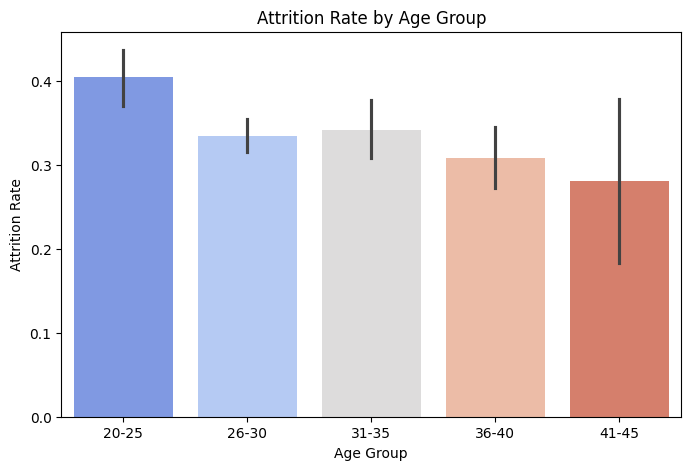

In [25]:
# Create Age Groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 25, 30, 35, 40, 45], labels=["20-25", "26-30", "31-35", "36-40", "41-45"])

# Plot attrition rate for each age group
plt.figure(figsize=(8, 5))
sns.barplot(x=df["AgeGroup"], y=df["LeaveOrNot"], palette="coolwarm")
plt.xlabel("Age Group")
plt.ylabel("Attrition Rate")
plt.title("Attrition Rate by Age Group")
plt.show()


In [26]:
from scipy.stats import ttest_ind

# Separate employees who left vs. stayed
left = df[df["LeaveOrNot"] == 1]["Age"]
stayed = df[df["LeaveOrNot"] == 0]["Age"]

# Perform independent t-test
t_stat, p_value = ttest_ind(left, stayed, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -3.383694484902654, P-value: 0.00072348533546021


The P-value is very small (< 0.05), meaning the difference in Age between employees who left and those who stayed is statistically significant.
This suggests that Age does impact attrition, even though the effect size (correlation) is weak.

In [20]:
print(df["Education"].value_counts())

Education
Bachelors    3585
Masters       869
PHD           179
Name: count, dtype: int64


In [19]:
print(df["PaymentTier"].value_counts())

PaymentTier
3    3477
2     915
1     241
Name: count, dtype: int64


In [21]:
print(df["Gender"].value_counts())


Gender
Male      2764
Female    1869
Name: count, dtype: int64


If a column has only one unique value, it does not provide useful information and should be dropped.

In [23]:
#We use the Chi-Square test to check if they significantly affect attrition.
from scipy.stats import chi2_contingency

def chi_square_test(col):
    contingency_table = pd.crosstab(df[col], df["LeaveOrNot"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{col}: Chi-Square Statistic={chi2}, P-value={p}")
    if p < 0.05:
        print(f"  → {col} significantly affects attrition.\n")
    else:
        print(f"  → {col} does NOT significantly affect attrition. Can be dropped.\n")


If p-value < 0.05 → The variable significantly affects attrition

If p-value > 0.05 → The variable does NOT significantly affect attrition

In [24]:
chi_square_test("Education")
chi_square_test("PaymentTier")
chi_square_test("Gender")

Education: Chi-Square Statistic=100.09138062432004, P-value=1.8426075841872277e-22
  → Education significantly affects attrition.

PaymentTier: Chi-Square Statistic=337.5800299308761, P-value=4.959385867930236e-74
  → PaymentTier significantly affects attrition.

Gender: Chi-Square Statistic=223.85591489408276, P-value=1.3041952841090827e-50
  → Gender significantly affects attrition.



#Data Pre-processing

In [30]:
df = df.drop(['JoiningYear', 'City'], axis=1)

In [32]:
# Label Encoding for categorical variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df['Gender'] = le.fit_transform(df['Gender'])
df['EverBenched'] = le.fit_transform(df['EverBenched'])

In [34]:
# Feature Scaling (normalize numerical features like Age)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'ExperienceInCurrentDomain']] = scaler.fit_transform(df[['Age', 'ExperienceInCurrentDomain']])


In [35]:
features = df[['Age', 'Education', 'PaymentTier', 'Gender', 'EverBenched', 'ExperienceInCurrentDomain']]
target = df['LeaveOrNot']

In [36]:
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

# Convert features and target to numpy arrays
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create DataLoader for batch processing
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

print(f"Train set size: {len(X_train_tensor)}, Test set size: {len(X_test_tensor)}")


Train set size: 3706, Test set size: 927


In [ ]:
import torch.nn as nn

class EmployeeAttritionModel(nn.Module):
    def __init__(self):
        super(EmployeeAttritionModel, self).__init__()
        
        self.fc1 = nn.Linear(6, 128)  # 6 input features -> 128 neurons
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64) 
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 32)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()  # Sigmoid activation for binary classification

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x


In [ ]:
# Initialize model
model = EmployeeAttritionModel()

# Define loss function and optimizer
loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# Training loop
num_epochs = 100

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = loss_function(outputs, batch_y.view(-1, 1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    avg_loss = total_loss / len(train_loader)
    if (epoch + 1) % 10 == 0:  # Print every 10 epochs
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')


In [ ]:
# Evaluation mode
model.eval()

with torch.no_grad():
    y_pred = model(X_test_tensor)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred >= 0.5).float()

# Calculate accuracy
accuracy = (y_pred_binary.view(-1) == y_test_tensor).float().mean()
print(f"Model Accuracy: {accuracy.item() * 100:.2f}%")
